In [12]:
# dataFrame based on demoGraphics
import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
import random

In [14]:
# Sample feedback for demonstration
feedback_samples = [
    "The network connection is really slow.",
    "I faced an outage for three hours yesterday.",
    "The customer support was really helpful.",
    "Billing issues! Charged me extra this month.",
    "Altice has the best internet service.",
    "The installation process was smooth.",
    "I'm not satisfied with the customer service response.",
    "Why does my connection drop so frequently?",
    "There are hidden charges in my bill!",
    "I'd recommend Altice to everyone."
]

channels = ["customer_support", "social_media", "audio_transcripts"]

# Generate dummy data
data = {
    "complaints": [random.choice(feedback_samples) for _ in range(100)],
    "Channel": [random.choice(channels) for _ in range(100)]
}

df = pd.DataFrame(data)

df.head()


,complaints,Channel
0,I'd recommend Altice to everyone.,social_media
1,I'd recommend Altice to everyone.,audio_transcripts
2,There are hidden charges in my bill!,audio_transcripts
3,The customer support was really helpful.,social_media
4,The installation process was smooth.,customer_support


# Text Cleaning or Text Pre-processiong

In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from langdetect import detect

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # 2. Convert to lowercase
    text = text.lower()
    
    # 7. Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    
    # 9. Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # 8. Remove special characters (excluding space)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 10. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 1. Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 4. Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # 5. Lemmatizing
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 11. Remove extra whitespaces
    text = " ".join(tokens)
    
    # 12. Sentence segmentation
    sentences = sent_tokenize(text)
    
    # 13. Language detection (just an example, you might need a more robust solution)
    lang = detect(text)
    
    # 14. Code switching detection (not implementing as it's quite involved and requires additional tools)
    # 15. N-gram generation (example for bigrams; you can adjust for other n-grams)
    bigrams = list(nltk.bigrams(tokens))
    
    # 16. Noise reduction (not implementing as it's specific to the dataset and might need manual rules)
    
    # Rejoining cleaned tokens to form the cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text, lang, bigrams

# Example:
text = "Your sample text with <html> tags </html> and https://example.com URLs."
cleaned_text, detected_lang, generated_bigrams = preprocess_text(text)

print(f"Cleaned Text: {cleaned_text}")
print(f"Detected Language: {detected_lang}")
print(f"Generated Bigrams: {generated_bigrams}")


Cleaned Text: sampl text tag url
Detected Language: tl
Generated Bigrams: [('sampl', 'text'), ('text', 'tag'), ('tag', 'url')]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# Assuming the function preprocess_text is already defined as above and df is our dataframe

# Applying the function to our dataframe's "complaints" column
df['cleaned_text'] = df['complaints'].apply(lambda x: preprocess_text(x)[0])

# If you're interested in capturing detected language and bigrams as well:
df['detected_lang'] = df['complaints'].apply(lambda x: preprocess_text(x)[1])
df['bigrams'] = df['complaints'].apply(lambda x: preprocess_text(x)[2])

df.head()

,complaints,Channel,cleaned_text,detected_lang,bigrams
0,I'd recommend Altice to everyone.,social_media,id recommend altic everyon,en,"[(id, recommend), (recommend, altic), (altic, ..."
1,I'd recommend Altice to everyone.,audio_transcripts,id recommend altic everyon,en,"[(id, recommend), (recommend, altic), (altic, ..."
2,There are hidden charges in my bill!,audio_transcripts,hidden charg bill,cy,"[(hidden, charg), (charg, bill)]"
3,The customer support was really helpful.,social_media,custom support realli help,en,"[(custom, support), (support, realli), (realli..."
4,The installation process was smooth.,customer_support,instal process smooth,en,"[(instal, process), (process, smooth)]"


# EDA for Text

# 1. Word Distributions

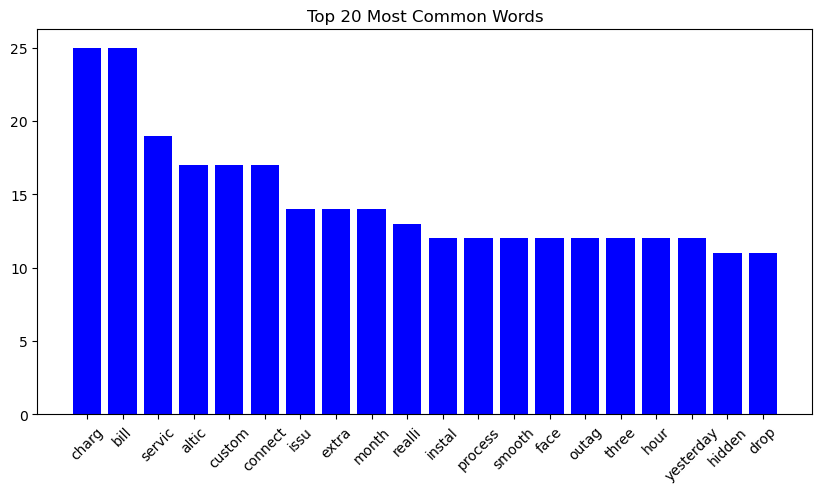

In [17]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Tokenizing the cleaned text
tokens = [word for row in df['cleaned_text'] for word in nltk.word_tokenize(row)]
word_freq = Counter(tokens)

# Plotting the top 20 most common words
common_words = word_freq.most_common(20)
words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

plt.figure(figsize=(10,5))
plt.bar(words, counts, color='blue')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


# 2 N-gram Analysis

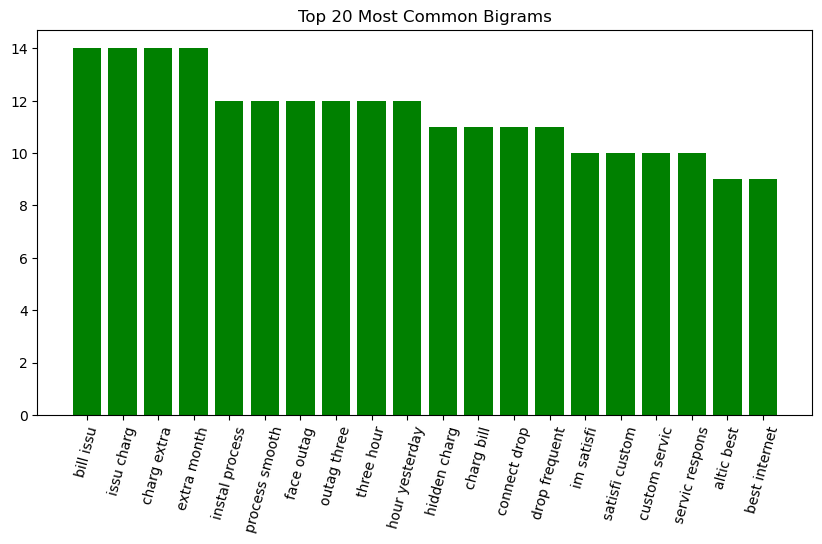

In [18]:
bigrams = nltk.bigrams(tokens)
bigram_freq = Counter(bigrams)

common_bigrams = bigram_freq.most_common(20)
bigrams = [' '.join(bigram[0]) for bigram in common_bigrams]
counts = [bigram[1] for bigram in common_bigrams]

plt.figure(figsize=(10,5))
plt.bar(bigrams, counts, color='green')
plt.title('Top 20 Most Common Bigrams')
plt.xticks(rotation=75)
plt.show()


# 3. Sparsity Visualizations

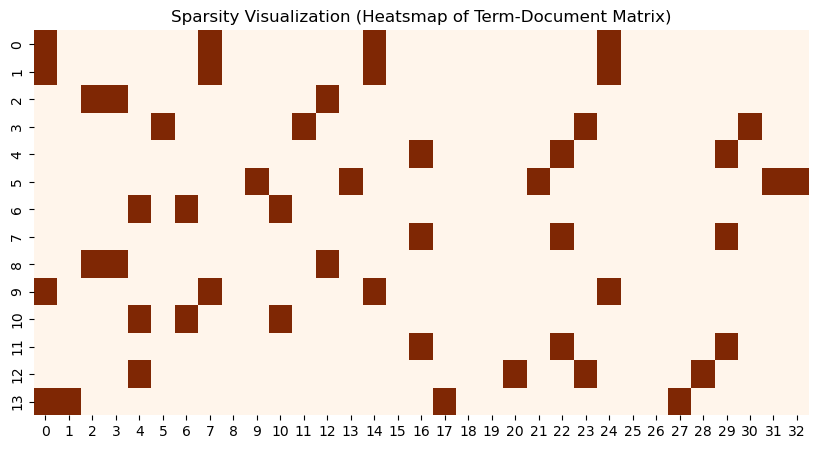

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Visualizing the sparsity
plt.figure(figsize=(10,5))
sns.heatmap(X.toarray()[:14], cmap='Oranges', cbar=False)
plt.title('Sparsity Visualization (Heatsmap of Term-Document Matrix)')
plt.show()


# 4 TF_IDF visualization

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can set max_features to limit the number of columns in the matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])


# LSa using --- Word Vectors using Count VBetcorizer and TF-IDF 

In [39]:
from sklearn.decomposition import TruncatedSVD

# Number of topics
n_topics = 5

# Apply LSA (TruncatedSVD)
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

# Define function to get top n words for each topic
def get_lsa_topics(model, vectorizer, n_words=10):
    terms = vectorizer.get_feature_names_out()
    topic_keywords = []
    for topic_weights in model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append([terms[i] for i in top_keyword_locs])
    return topic_keywords

# Get top 10 keywords for each topic
topic_keywords = get_lsa_topics(lsa_model, tfidf_vectorizer, n_words=10)

# Print the topics
for index, topic in enumerate(topic_keywords):
    print(f"Topic {index + 1}:")
    print(", ".join(topic))
    print("\n")


Topic 1:
bill, charg, extra, month, issu, hidden, instal, smooth, process, recommend


Topic 2:
instal, smooth, process, face, outag, three, hour, yesterday, drop, frequent


Topic 3:
yesterday, outag, face, three, hour, hidden, month, issu, extra, bill


Topic 4:
servic, custom, satisfi, im, respons, connect, altic, frequent, drop, best


Topic 5:
connect, frequent, drop, slow, network, realli, issu, extra, month, hidden




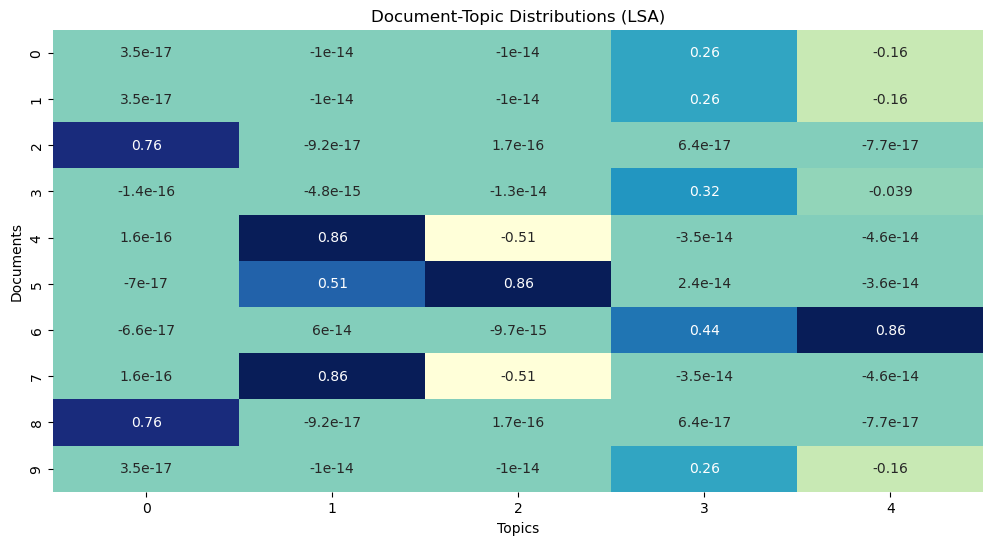

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(lsa_topic_matrix[:10], annot=True, cmap="YlGnBu", cbar=False)
plt.title('Document-Topic Distributions (LSA)')
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.show()


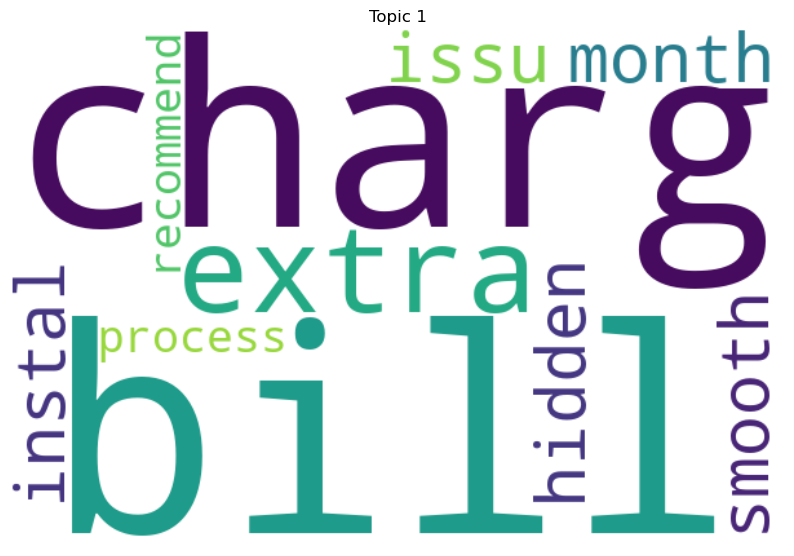

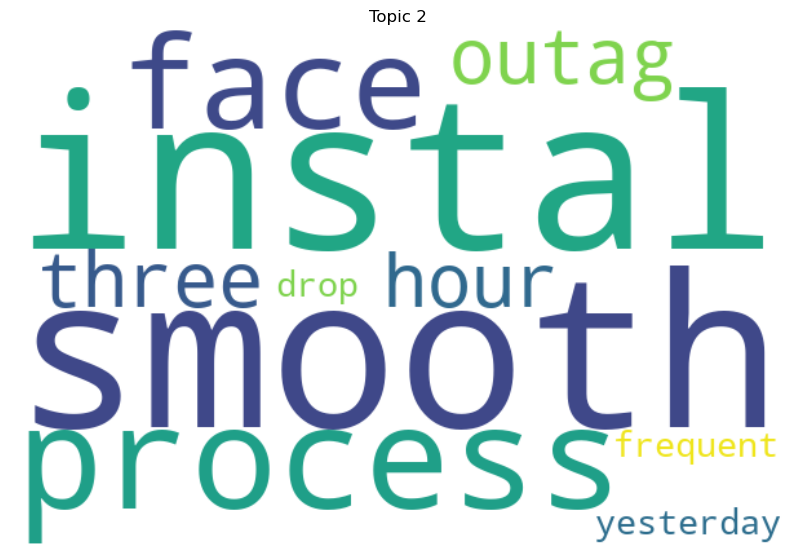

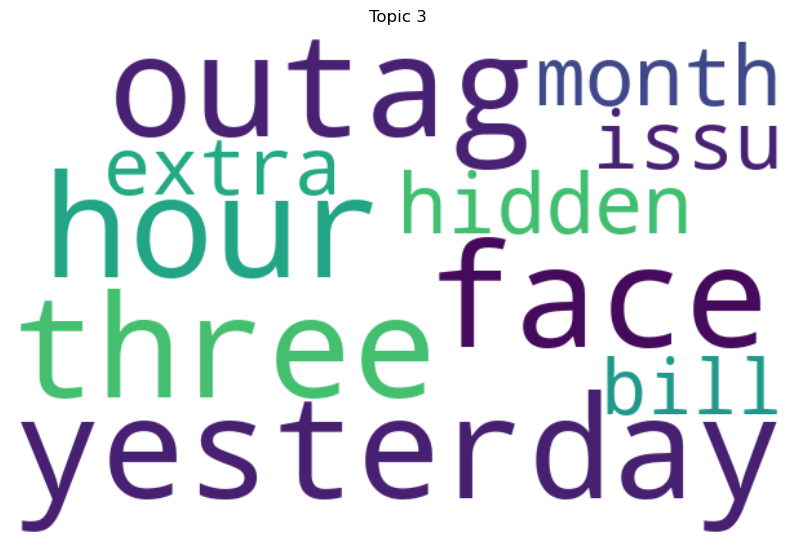

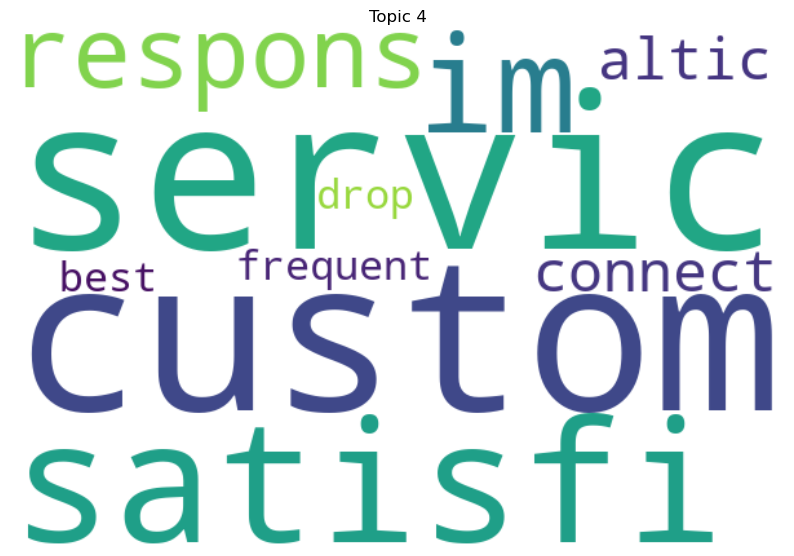

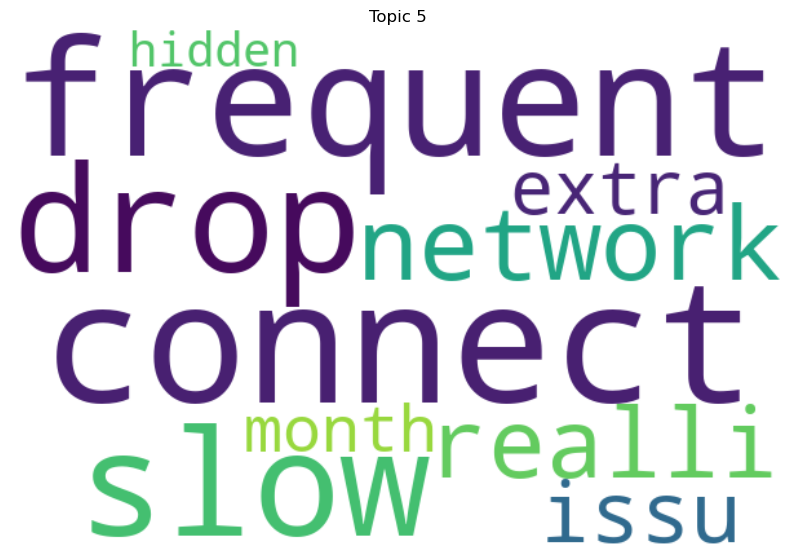

In [46]:
from wordcloud import WordCloud

# Generate a word cloud for each topic
for i, topic in enumerate(topic_keywords):
    wc = WordCloud(width=600, height=400, background_color="white", random_state=42).generate(" ".join(topic))
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i + 1}')
    plt.show()


# Metrics